In [63]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#4/1AX4XfWhwr1YOfUOf5fh8dR18lZu2Tdd5_oe15FmEvPoBqDBzvz1bofaWn_4

In [117]:
# Generic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import signal
from scipy.fft import fftshift
import scipy
from datetime import datetime


#ML Libs
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Lambda
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from keras import backend as K
import scipy.ndimage as nd
from keras.models import Sequential,load_model
from keras import regularizers
from keras import initializers
from keras import metrics
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Convolution2D, MaxPooling2D, BatchNormalization, ReLU, LeakyReLU, Conv2D
from keras import layers
from keras.optimizers import Adam, Adagrad, RMSprop
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report



Terminal = True

#Loading SQI Matched with clinitcal to the Dataframe


In [65]:
#Loading SQI Matched with clinical to the Dataframe

id = '1DDf_vluJE-zg--41A0zpP5_9-FU-wsJp' # The shareable link id
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Complete_SQIs_with_Clinical.csv')  
SQI_C = pd.read_csv('Complete_SQIs_with_Clinical.csv')


In [66]:
id = '1zEpiX0yXT16cz3znpo8wjoV_U_8vSoyb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Raw_signals.csv')  
Raw = pd.read_csv('Raw_signals.csv')

In [67]:
if Terminal:
    print("\n SQI with Clinical Match:")
    print(SQI_C)
    print("\n Raw Signals")
    print(Raw)


 SQI with Clinical Match:
       Unnamed: 0               timedelta  ... pleural_effusion skidney
0               0  0 days 00:05:00.010000  ...              NaN     NaN
1               1  0 days 00:05:30.010000  ...              NaN     NaN
2               2  0 days 00:06:00.010000  ...              NaN     NaN
3               3  0 days 00:06:30.010000  ...              NaN     NaN
4               4  0 days 00:07:00.010000  ...              NaN     NaN
...           ...                     ...  ...              ...     ...
12698       12698  0 days 15:03:30.010000  ...              NaN     NaN
12699       12699  0 days 15:04:00.010000  ...              NaN     NaN
12700       12700  0 days 15:04:30.010000  ...              NaN     NaN
12701       12701  0 days 15:05:00.010000  ...              NaN     NaN
12702       12702  0 days 15:05:30.010000  ...              NaN     NaN

[12703 rows x 42 columns]

 Raw Signals
                       timedelta      idx  ...  study_no  study_no_r

In [68]:
event = ['event_shock', 'reshock24','diagnosis_admission',\
     'ascites', 'respiratory_distress', 'ventilation_cannula', \
     'ventilation_mechanical', 'ventilation_ncpap', 'bleeding_severe', \
     'cns_abnormal', 'liver_mild', 'pleural_effusion', 'skidney']

event_shock = 'shock_admission'

SQI_C['keep'] = False
for i in range(len(event)):
    event_s = event[i]
    SQI_C['keep'][SQI_C[event_s] == True] = True
    #print("\n Total ", event[i], " events:")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying t

In [167]:
#Patient 1 had no shock
#Patient 2 had shock 
P1times = datetime.strptime('20072020143000000', '%d%m%Y%H%M%S%f')
P1timef = datetime.strptime('20072020163000000', '%d%m%Y%H%M%S%f')

P2times = datetime.strptime('03112020103000000', '%d%m%Y%H%M%S%f')
P2timef = datetime.strptime('03112020123000020', '%d%m%Y%H%M%S%f') #added 20 miliseconds to match the length of Patient 1

P3times = datetime.strptime('18092020200000000', '%d%m%Y%H%M%S%f')##########
P3timef = datetime.strptime('18092020210000000', '%d%m%Y%H%M%S%f') 


Raw.PPG_Datetime = pd.to_datetime(Raw.PPG_Datetime)

Patient1 = Raw[(Raw.study_no == '003-2162') & (P1times <= Raw.PPG_Datetime) & (P1timef > Raw.PPG_Datetime)]
Patient2 = Raw[(Raw.study_no == '003-2028') & (P2times <= Raw.PPG_Datetime) & (P2timef > Raw.PPG_Datetime)]
Patient3 = Raw[(Raw.study_no == '003-2104') & (P3times <= Raw.PPG_Datetime) & (P3timef > Raw.PPG_Datetime)]#############


Patient1['Label'] = 0 
Patient2['Label'] = 1
Patient3['Label'] = 1
print(Patient1)
print(Patient2)
print(Patient3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

                       timedelta     idx  PLETH  ...  study_no study_no_rec  Label
32805210  0 days 00:24:52.810000  149108  25632  ...  003-2162            0      0
32805211  0 days 00:24:52.820000  149109  24874  ...  003-2162            0      0
32805212  0 days 00:24:52.830000  149110  24029  ...  003-2162            0      0
32805213  0 days 00:24:52.840000  149111  23107  ...  003-2162            0      0
32805214  0 days 00:24:52.850000  149112  22124  ...  003-2162            0      0
...                          ...     ...    ...  ...       ...          ...    ...
33525205  0 days 02:24:52.760000  869103  35882  ...  003-2162            0      0
33525206  0 days 02:24:52.770000  869104  35281  ...  003-2162            0      0
33525207  0 days 02:24:52.780000  869105  34590  ...  003-2162            0      0
33525208  0 days 02:24:52.790000  869106  33807  ...  003-2162            0      0
33525209  0 days 02:24:52.800000  869107  32933  ...  003-2162            0      0

[72

In [185]:
#Patient1.IR_ADC_bpf = (Patient1.IR_ADC_bpf - Patient1.IR_ADC_bpf.mean())/(Patient1.IR_ADC_bpf.std())
#Patient2.IR_ADC_bpf = (Patient2.IR_ADC_bpf - Patient2.IR_ADC_bpf.mean())/(Patient2.IR_ADC_bpf.std())

print(Patient1.IR_ADC_bpf.std())

#Patient2.IR_ADC_bpf = Patient2.IR_ADC_bpf + Patient2.IR_ADC_bpf.min()
#(Patient2.IR_ADC_bpf - Patient2.IR_ADC_bpf.min())/(Patient2.IR_ADC_bpf.max() - Patient2.IR_ADC_bpf.min())


#Splititng aerray into windows
Patient1_w = np.array_split(Patient1, 100)
Patient2_w = np.array_split(Patient2, 100)
Patient3_w = np.array_split(Patient3, 50)##########

def choose_signal(Patient_w, signal):
  Patient_w_arr = np.empty((len(Patient1_w),7200,))
  for i in range(len(Patient_w)):
    Patient_w_arr[i] = Patient_w[i][signal]
  
  return Patient_w_arr

Patient1_w_arr = choose_signal(Patient1_w, 'PLETH_bpf') #Change here for PLETH
Patient2_w_arr = choose_signal(Patient2_w, 'PLETH_bpf')
Patient3_w_arr = choose_signal(Patient3_w, 'PLETH_bpf')#############


Patient1_w_arr_l = np.zeros((100,1), dtype=int)
Patient2_w_arr_l = np.ones((100,1), dtype=int)
Patient3_w_arr_l = np.ones((100,1), dtype=int)############


P1_tr, P1_te, P1_tr_l, P1_te_l = train_test_split(Patient1_w_arr, Patient1_w_arr_l, test_size = 0.2)
P2_tr, P2_te, P2_tr_l, P2_te_l = train_test_split(Patient2_w_arr, Patient2_w_arr_l, test_size = 0.2)

#Extracting mean and std from training se to apply onto both the training and test set to avoid data leakage

TEST1 = np.vstack((P1_tr,P2_tr))
Test1mean = np.mean(TEST1)
Test1std = np.mean(TEST1)

P1mean = np.mean(P1_tr)
P2mean = np.mean(P2_tr)

P1std = np.std(P1_tr)
P2std = np.std(P2_tr)

P1_training = (P1_tr - Test1mean) / Test1std
P2_training = (P2_tr - Test1mean) / Test1std
P1_test = (P1_te - Test1mean) / Test1std
P2_test = (P2_te - Test1mean) / Test1std

# P1_training = (P1_tr - P1mean) / P1std
# P2_training = (P2_tr - P2mean) / P2std
# P1_test = (P1_te - P1mean) / P1std
# P2_test = (P2_te - P2mean) / P2std

Ztest = (Patient3_w_arr - Test1mean) / Test1std##########

print(P1_training.shape)
print(P1_test.shape)



3779.5148767132177
(80, 7200)
(20, 7200)


30550.83432873656


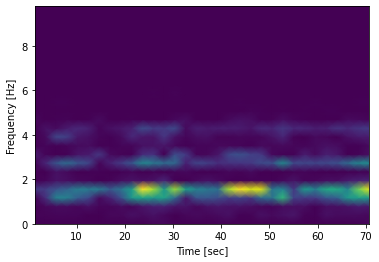

(26, 32)
[0.       0.390625 0.78125  1.171875 1.5625   1.953125 2.34375  2.734375
 3.125    3.515625 3.90625  4.296875 4.6875   5.078125 5.46875  5.859375
 6.25     6.640625 7.03125  7.421875 7.8125   8.203125 8.59375  8.984375
 9.375    9.765625]
[ 1.28  3.52  5.76  8.   10.24 12.48 14.72 16.96 19.2  21.44 23.68 25.92
 28.16 30.4  32.64 34.88 37.12 39.36 41.6  43.84 46.08 48.32 50.56 52.8
 55.04 57.28 59.52 61.76 64.   66.24 68.48 70.72]
100
272707414.87631977


In [186]:
#TESTING WINDOW and Spectrogram Plotting================================================================


#Sampling rate
fs = 100

TestPlotPatientWindow = P2_training[40]
#TestPlotPatientWindow = np.array(TestPlotPatientWindow)


#TestPlotPatientWindow = (TestPlotPatientWindow - (TestPlotPatientWindow)) / np.std(TestPlotPatientWindow)

#TestPlotPatientWindow = TestPlotPatientWindow + abs(np.min(TestPlotPatientWindow))
#TestPlotPatientWindow = (TestPlotPatientWindow - np.min(TestPlotPatientWindow)) / (np.max(TestPlotPatientWindow) - np.min(TestPlotPatientWindow))

print(np.max(TestPlotPatientWindow))


f, t, Sxx = signal.spectrogram(TestPlotPatientWindow, fs)

fmin = 0 # Hz
fmax = 10 # Hz
freq_slice = np.where((f >= fmin) & (f <= fmax))

# keep only frequencies of interest
f   = f[freq_slice]
Sxx = Sxx[freq_slice,:][0]


plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(Sxx.shape)
print(f)
print(t)
print(len(Patient1_w))
print(np.max(Sxx))

In [187]:
meanc = (0,0)
counter = 0
#Checking correlations between patien windows
for i in range(len(P1_training)):
  for j in range(len(P2_training)):
    corre = scipy.stats.pearsonr(P1_training[i], P2_training[j])
    if abs(corre[0]) >= 0.5 : #changing correlation coeff
      print("Window P2: ", i)
      print("Window P1: ", j)
      print(corre)
      counter = counter + 1

print('Number of Windows with correlation (>0.5) out of 10000: ')
print(counter)

#Means we there is a significant difference between the two records (NOT INDICATIVE)

Number of Windows with correlation (>0.5) out of 10000: 
0


In [188]:
#print(Patient1_w[2])
#Empty arrays
P1Sxx = np.empty((len(P1_training),26,32))
P1Sxxtest = np.empty((len(P1_test),26,32))
P2Sxx = np.empty((len(P2_training),26,32))
P2Sxxtest = np.empty((len(P2_test),26,32))

ZSxxtest = np.empty((len(Ztest),26,32))
#Calculating spectrograms for each Patient separately on each window (120 windows) within 0 and 20 Hz
#Patient 1

def spectrogram_arr(Input, Output_arr, fs):
  for i in range(len(Input)):
    f, t, Sxx = signal.spectrogram(Input[i], fs)
    fmin = 0 # Hz
    fmax = 10 # Hz
    freq_slice = np.where((f >= fmin) & (f <= fmax))
    # keep only frequencies of interest
    f   = f[freq_slice]
    Sxx = Sxx[freq_slice,:][0]
    Output_arr[i] = Sxx
  
  return Output_arr

P1Sxx = spectrogram_arr(P1_training, P1Sxx, fs)
P1Sxxtest = spectrogram_arr(P1_test, P1Sxxtest, fs)
P2Sxx = spectrogram_arr(P2_training, P2Sxx, fs)
P2Sxxtest = spectrogram_arr(P2_test, P2Sxxtest, fs)

ZPred = spectrogram_arr(Ztest, ZSxxtest, fs)

if Terminal:
  print("\n P1 Training array Shape")
  print(P1Sxx.shape)
  print("\n P1 Test array Shape")
  print(P1Sxxtest.shape)
  print("\n P2 Training array Shape")
  print(P2Sxx.shape)
  print("\n P2 Test array Shape")
  print(P2Sxxtest.shape)

# #Shuffling
# np.random.seed(3) #sp that our code is reproducible 
# np.random.shuffle(P1Sxx)
# np.random.shuffle(P2Sxx)

# if Terminal:
#   print("\n Shape before split, after shuffling (Patient 1):")
#   print(P1Sxx.shape)

#Splitting into train and test
# TrainP1, TestP1 = P1Sxx[:80,:,:], P1Sxx[80:,:,:]
# TrainP2, TestP2 = P2Sxx[:80,:,:], P2Sxx[80:,:,:]

# if Terminal:
#   print("\nPatient 1 Test and Train Arrays:")
#   print(TrainP1.shape)
#   print(TestP1.shape)
#   print("\nPatient 2 Test and Train Arrays:")
#   print(TrainP1.shape)
#   print(TestP1.shape)


 P1 Training array Shape
(80, 26, 32)

 P1 Test array Shape
(20, 26, 32)

 P2 Training array Shape
(80, 26, 32)

 P2 Test array Shape
(20, 26, 32)


In [189]:
#Joining Data
Xtrain = np.vstack((P1Sxx,P2Sxx))
ytrain = np.vstack((P1_tr_l,P2_tr_l))
Xtest = np.vstack((P1Sxxtest,P2Sxxtest))
ytest = np.vstack((P1_te_l,P2_te_l))


X_train, y_train =  shuffle(Xtrain, ytrain)
X_test, y_test =  shuffle(Xtest, ytest)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(ZPred.shape)
print(Patient3_w_arr_l.shape)


(160, 26, 32)
(160, 1)
(40, 26, 32)
(40, 1)
(100, 26, 32)
(100, 1)


Train Labels
(160, 2)
Train Data
(160, 26, 32, 1)
Epoch 1/200
4/4 [==============================] - 4s 229ms/step - loss: 0.7585 - categorical_accuracy: 0.5042 - val_loss: 0.7128 - val_categorical_accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 0.7010 - categorical_accuracy: 0.5552 - val_loss: 0.9655 - val_categorical_accuracy: 0.4375
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.7114 - categorical_accuracy: 0.5250 - val_loss: 0.7052 - val_categorical_accuracy: 0.4375
Epoch 4/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6964 - categorical_accuracy: 0.5323 - val_loss: 0.6982 - val_categorical_accuracy: 0.5625
Epoch 5/200
4/4 [==============================] - 0s 15ms/step - loss: 0.7004 - categorical_accuracy: 0.4938 - val_loss: 0.6946 - val_categorical_accuracy: 0.4375
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6961 - categorical_accuracy: 0.5573 - val_loss: 0.7036 

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[[ 0  0]
 [84 16]]


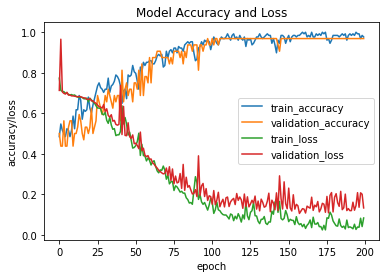

In [191]:
#MACHINE LEARNING MODEL ==================CUSTOM CNN=========================
tf.random.set_seed(1234)

#converting to categorical
y_trainf = tf.keras.utils.to_categorical(y_train)
y_testf = tf.keras.utils.to_categorical(y_test)
Zlabels = tf.keras.utils.to_categorical(Patient3_w_arr_l)
X_trainf = X_train.reshape(160, 26, 32, 1)
X_testf = X_test.reshape(40, 26, 32, 1)
ZPredf = ZPred.reshape(100, 26, 32, 1)

if Terminal:
  print('Train Labels')
  print(y_trainf.shape)
  print('Train Data')
  print(X_trainf.shape)




initialization = 'glorot_uniform'
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same'))#, kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(64, (2, 2), padding='same'))#, kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Conv2D(128, (2, 2), padding='same'))#, kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(128, (2, 2), padding='valid', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(32,'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(2))#, kernel_initializer=initialization))
model.add(Activation('softmax'))

# . . . 


model.compile(optimizer=Adam(learning_rate=3e-4),loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(X_trainf, y_trainf, epochs=200, validation_split=0.2)#, callbacks=[early_stopping])

score = model.evaluate(X_testf, y_testf)

y_pred = model.predict_classes(ZPredf)

print(confusion_matrix(Patient3_w_arr_l, y_pred))
#print(classification_report(y_test, y_pred))

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy', 'train_loss', 'validation_loss'], loc='best')
plt.show()

In [94]:
#PRE-PROCESSING TO MAKE COMPATIBLE WITH VGG16==================================
#converting to categorical
# y_train = tf.keras.utils.to_categorical(y_trainO)
# y_test = tf.keras.utils.to_categorical(y_testO)

if Terminal:
  print('Train Labels')
  print(y_train.shape)

X_trainVGG = np.stack((X_train,X_train,X_train), axis = -1)
X_testVGG = np.stack((X_test,X_test,X_test), axis = -1)
print(X_trainVGG.shape)
print(X_testVGG.shape)

#=========================================================MODEL================
model = VGG16(include_top=False, input_shape=(52,32,3), weights='imagenet')

# Freeze all the layers
#for layer in model.layers[:]:
#    layer.trainable = False

# Add the same dense layers as in VGG16
output = model.output

output = GlobalAveragePooling2D()(output)
output = Dense(units=2, activation='softmax')(output)

model = Model(model.input, output)



model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(X_trainVGG, y_train, epochs=5000, validation_split=0.2)#, callbacks=[early_stopping])

score = model.evaluate(X_testVGG, y_test)

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy', 'train_loss', 'validation_loss'], loc='best')
plt.show()


Train Labels
(160, 1)
(160, 26, 32, 3)
(40, 26, 32, 3)
58900480/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 52, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 52, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 26, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 26, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 26, 16, 128)       147584    
_______

ValueError: ignored